In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('Diabetes Missing Data.csv')
print(data.head())

   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0         6    148.0          72.0       35.0            NaN  33.6   
1         1     85.0          66.0       29.0            NaN  26.6   
2         8    183.0          64.0        NaN            NaN  23.3   
3         1     89.0          66.0       23.0           94.0  28.1   
4         0    137.0          40.0       35.0          168.0  43.1   

   Diabetes_Pedigree  Age  Class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


In [12]:
print(data.shape)

(768, 9)


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


In [14]:
print(data.isnull().sum())

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [16]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False))

Serum_Insulin        48.697917
Skin_Fold            29.557292
Diastolic_BP          4.557292
BMI                   1.432292
Glucose               0.651042
Pregnant              0.000000
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64


In [24]:
missing_values = [
    'Serum_Insulin',
    'Skin_Fold',
    'Diastolic_BP',
    'BMI',
    'Glucose'
]

data[missing_values] = data[missing_values].replace(0,np.nan)
print(data[missing_values])

     Serum_Insulin  Skin_Fold  Diastolic_BP   BMI  Glucose
0              NaN       35.0          72.0  33.6    148.0
1              NaN       29.0          66.0  26.6     85.0
2              NaN        NaN          64.0  23.3    183.0
3             94.0       23.0          66.0  28.1     89.0
4            168.0       35.0          40.0  43.1    137.0
..             ...        ...           ...   ...      ...
763          180.0       48.0          76.0  32.9    101.0
764            NaN       27.0          70.0  36.8    122.0
765          112.0       23.0          72.0  26.2    121.0
766            NaN        NaN          60.0  30.1    126.0
767            NaN       31.0          70.0  30.4     93.0

[768 rows x 5 columns]


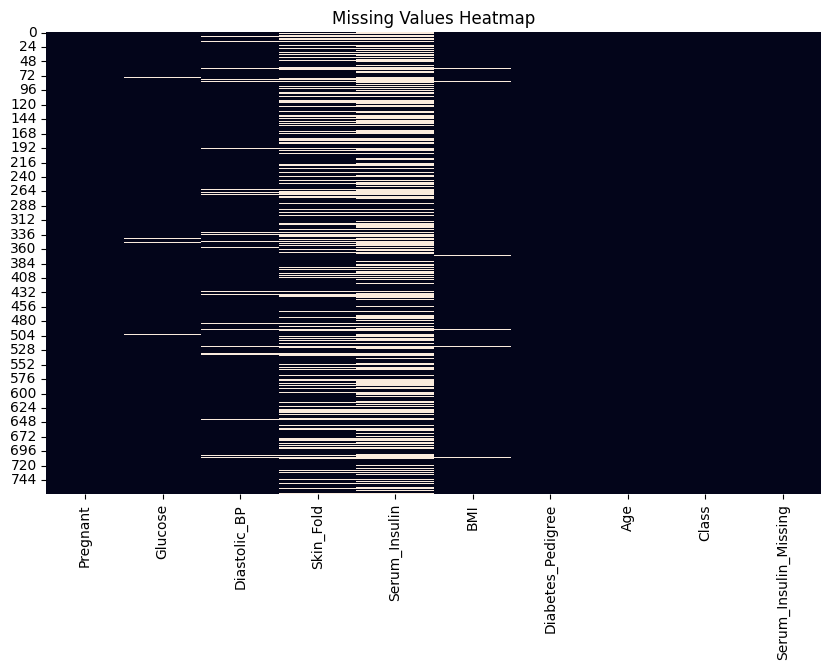

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

Missing Indicator for Serum Insulin

In [37]:
data['Serum_Insulin_Missing'] = data['Serum_Insulin'].isnull().astype(int)
data['Serum_Insulin'].fillna(data['Serum_Insulin'].median(), inplace=True)
print(data[['Serum_Insulin', 'Serum_Insulin_Missing']].head())
print(data['Serum_Insulin'].isnull().sum())

   Serum_Insulin  Serum_Insulin_Missing
0          125.0                      0
1          125.0                      0
2          125.0                      0
3           94.0                      0
4          168.0                      0
0


Missing Indicator for Skin

In [39]:
data['Skin_Fold'] = data.groupby('Class')['Skin_Fold'].transform(
    lambda x : x.fillna(x.median())
)
print(data['Skin_Fold'].isnull().sum())

0


In [41]:
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['Diastolic_BP'].fillna(data['Diastolic_BP'].mean(), inplace=True)  
print(data.isnull().sum())

Pregnant                 0
Glucose                  0
Diastolic_BP             0
Skin_Fold                0
Serum_Insulin            0
BMI                      0
Diabetes_Pedigree        0
Age                      0
Class                    0
Serum_Insulin_Missing    0
dtype: int64


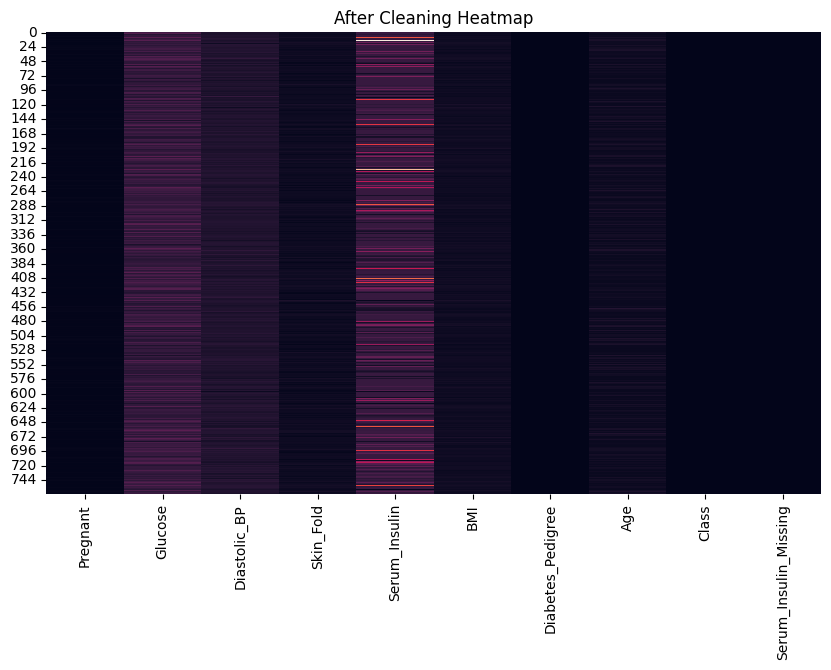

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(data, cbar=False)
plt.title('After Cleaning Heatmap')
plt.show()